In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# turbulence package
import turbpy

In [2]:
def cuesCov(df, columns, window=30):
    
    '''Compute the covariance between two columns in the CUES dataframe timeseries 
    along a rolling window, with window length specified in minutes.
    Return a timeseries dataframe of those covariance values.'''
    
    # Select only the columns we need to calculate covariances
    cues_df = df[[columns[0],columns[1]]].copy()
    
    # Compute a rolling window covariance
    _cues_cov = cues_df.rolling(window).cov().reset_index(1)
    _cues_cov = _cues_cov[ _cues_cov['level_1'] == columns[1] ]
    _cues_cov = _cues_cov.drop(columns=['level_1',columns[1]])
    cues_cov = _cues_cov.rename(columns={columns[0]: '{}_{}_cov'.format(columns[0],columns[1])})
    
    return cues_cov.resample('{}min'.format(window)).mean()

def potential_temperature(temperature, pressure):
    '''Calculate potential temperature given a temperature [K or C] and pressure [hPA]'''
    
    R_cp = 0.286 # R / cp (for air)
    p0 = 1000 # reference pressure [hPa]
    
    # potential temperature
    theta = temperature * ( p0 / pressure )**R_cp
    
    return theta

def virtual_temperature(temperature,mixing_ratio):
    '''Calculate virtual temperature given a temperature [K or C] and mixing ratio'''
    
    # virtual temperature
    Tv = temperature * (1 + 0.61 * mixing_ratio)
    
    return Tv

def reynolds_decomposition(scalar, window=30):
    
    s_bar = scalar.rolling(window).mean()
    s_prime = scalar - s_bar
    
    return s_bar, s_prime

#def obukhovLength():
#    
#    g = 9.81 # gravitational acceleration [ms^-2]
#    k = 0.4 # von Karman constant
#    
#    
#    virtual_pot_temp = virtual_temp * ( p0 / p ) ** ( R_cp )
#    
#    L = ( virtual_pot_temp * friction_velocity**3 ) / ( k * g * kinematic_sensible_heat_flux)
#    
#    return L
#
#def sensibleHeatFlux():
#    
#    w_q =  # time averaged instantaneous covariance of vertical wind (w) and specific humidity (q) [kg kg^-1]
#    w_Tv = # time averaged instantaneous covariance of vertical wind (w) and virtual temperature (Tv)
#    w_theta =  w_Tv - ( 0.61 * w_q ) # time averaged instantaneous covariance of vertical wind (w) and potential temp (theta) [m s^-1]
#    rho = # air density [kg m^-3]
#    cp = 1004.67 # specific heat of air [J kg^-1 K^-1]
#    
#    H = -rho * cp * w_theta
#    
#    return H # [W m^-2]
#
#def latentHeatFlux():
#    
#    Lv = # latent heat of vaporization of water [J kg^-1]
#    w_q =  # time averaged instantaneous covariance of vertical wind (w) and specific humidity (q) [kg kg^-1]
#    
#    return L # [W m^-2]

In [3]:
cues = pd.read_pickle('data/CUES_L1_Temp_Rad_Wind_Mar-Apr2017.pkl')

In [4]:
cues.columns

Index(['Platform relative humidity; platform temperature/relative humidity; (percent)',
       'Platform temperature; platform temperature/relative humidity; (degrees Celsius)',
       'snow temperature 1; thermister 1; (degrees Celsius)',
       'snow temperature 2; thermister 2; (degrees Celsius)',
       'snow temperature 3; thermister 3; (degrees Celsius)',
       'snow temperature 4; thermister 4; (degrees Celsius)',
       'snow temperature 5; thermister 5; (degrees Celsius)',
       'snow temperature 6; thermister 6; (degrees Celsius)',
       'snow temperature 7; thermister 7; (degrees Celsius)',
       'snow temperature 8; thermister 8; (degrees Celsius)',
       'soil temperature @ 0cm; soil temp at 0cm  center; (degrees Celsius)',
       'soil temperature @ 10cm; soil temp at 10cm  center; (degrees Celsius)',
       'soil temperature @ 20cm; soil temp at 20cm  center; (degrees Celsius)',
       'soil temperature @ 30cm; soil temp at 30cm  center; (degrees Celsius)',
       '

C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


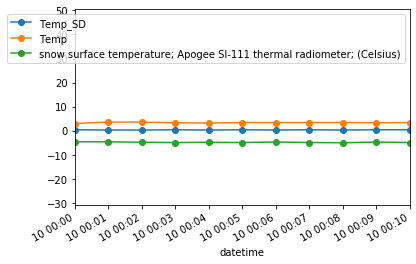

In [5]:
startdate = pd.Timestamp('2017-03-10')
enddate = pd.Timestamp('2017-03-10 00:10')

#cues['sonic wind direction; Sonic anemometer; (degrees)'].plot(marker='o')
#cues['Sonic wind direction  standard deviation; Sonic anemometer; (degrees)'].plot(marker='o')
#cues['wind quality; ws600 wind quality; (percent)'].plot(marker='o')
cues.Temp_SD.plot(marker='o')
cues.Temp.plot(marker='o')
cues['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].plot(marker='o')

plt.xlim((startdate,enddate))
plt.legend()

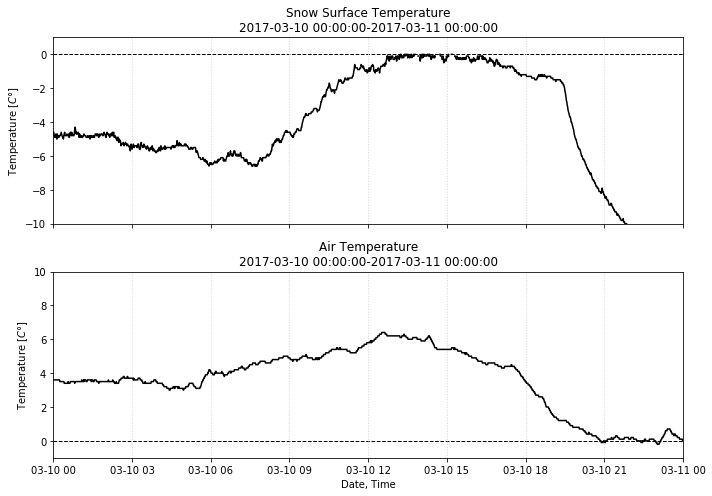

In [6]:
startdate = pd.Timestamp('2017-03-10')
enddate = pd.Timestamp('2017-03-11')

fig, ax = plt.subplots(2,1,figsize=(10,7))
# Snow surface temp
ax[0].set_title('Snow Surface Temperature\n{}-{}'.format(startdate,enddate))
cues['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].plot(ax=ax[0],
                                                                                  c='k')
ax[0].set_ylim((-10,1))

# Air temp
ax[1].set_title('Air Temperature\n{}-{}'.format(startdate,enddate))
cues['Platform temperature; platform temperature/relative humidity; (degrees Celsius)'].plot(ax=ax[1],
                                                                                            c='k')
ax[1].set_ylim((-1,10))


# finish up plot labels, axes, etc
for _ax in ax:
    _ax.set_xlim((startdate,enddate))
    #_ax.set_ylim((-15,15))
    _ax.set_ylabel('Temperature [$C\degree$]')
    _ax.set_xlabel('Date, Time')
    _ax.grid(axis='x',color='lightgrey', linestyle=':', linewidth=1)
    _ax.axhline(0,color='k', linestyle='--', linewidth=1, zorder=-99)

fig.autofmt_xdate(rotation=0, ha='center')
plt.tight_layout()

In [7]:
precip = pd.read_pickle('data/CUES_L1_Precip_Mar-Apr2017.pkl')

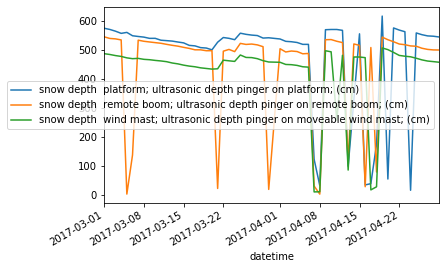

In [8]:
precip['snow depth  platform; ultrasonic depth pinger on platform; (cm)'].plot()
precip['snow depth  remote boom; ultrasonic depth pinger on remote boom; (cm)'].plot()
precip['snow depth  wind mast; ultrasonic depth pinger on moveable wind mast; (cm)'].plot()
plt.legend()

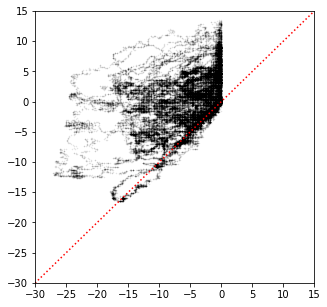

In [9]:
plt.figure(figsize=(5,5))

plt.scatter(x=cues['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'],
           y=cues['Platform temperature; platform temperature/relative humidity; (degrees Celsius)'],
           marker='.',s=1,alpha=0.1,c='k')

plt.xlim((-30,15))
plt.ylim((-30,15))
plt.plot([-50,50],[-50,50],':',color='red')

In [10]:
cues.columns

Index(['Platform relative humidity; platform temperature/relative humidity; (percent)',
       'Platform temperature; platform temperature/relative humidity; (degrees Celsius)',
       'snow temperature 1; thermister 1; (degrees Celsius)',
       'snow temperature 2; thermister 2; (degrees Celsius)',
       'snow temperature 3; thermister 3; (degrees Celsius)',
       'snow temperature 4; thermister 4; (degrees Celsius)',
       'snow temperature 5; thermister 5; (degrees Celsius)',
       'snow temperature 6; thermister 6; (degrees Celsius)',
       'snow temperature 7; thermister 7; (degrees Celsius)',
       'snow temperature 8; thermister 8; (degrees Celsius)',
       'soil temperature @ 0cm; soil temp at 0cm  center; (degrees Celsius)',
       'soil temperature @ 10cm; soil temp at 10cm  center; (degrees Celsius)',
       'soil temperature @ 20cm; soil temp at 20cm  center; (degrees Celsius)',
       'soil temperature @ 30cm; soil temp at 30cm  center; (degrees Celsius)',
       '

In [4]:
cues['Sonic3D_U_bar'], cues['Sonic3D_U_prime'] = reynolds_decomposition(cues['Sonic3D_U'])
cues['Sonic3D_V_bar'], cues['Sonic3D_V_prime'] = reynolds_decomposition(cues['Sonic3D_V'])
cues['Sonic3D_W_bar'], cues['Sonic3D_W_prime'] = reynolds_decomposition(cues['Sonic3D_W'])

(736420.0, 736421.0)

C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


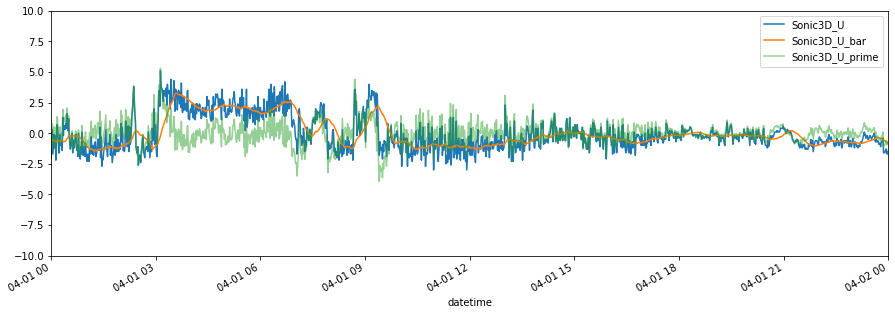

In [12]:
startdate = pd.Timestamp('2017-04-01')
enddate = pd.Timestamp('2017-04-02')

plt.figure(figsize=(15,5))

cues.Sonic3D_U.plot()
cues.Sonic3D_U_bar.plot()
cues.Sonic3D_U_prime.plot(alpha=0.5)

plt.legend()
plt.ylim((-10,10))
plt.xlim((startdate,enddate))

In [5]:
cues_uw_cov = cuesCov(cues, ['Sonic3D_U_prime', 'Sonic3D_W_prime'], window=30)
cues_vw_cov = cuesCov(cues, ['Sonic3D_V_prime', 'Sonic3D_W_prime'], window=30)

cues['Sonic3D_PotentialTemp'] = potential_temperature(cues.Temp, cues['bunker air pressure  not adjusted; bunker air temperature  atmospheric pressure and CO2 sensor; (millibars)'])
cues['Sonic3D_PotentialTemp_bar'], cues['Sonic3D_PotentialTemp_prime'] = reynolds_decomposition(cues['Sonic3D_W'])
cues_wT_cov = cuesCov(cues, ['Sonic3D_W_prime', 'Sonic3D_PotentialTemp_prime'], window=30)

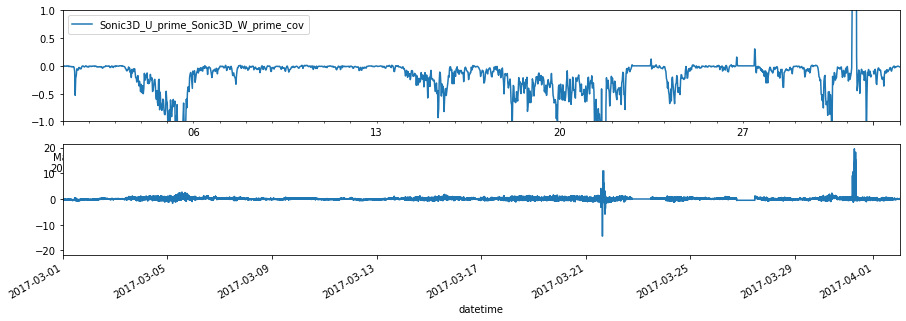

In [14]:
startdate = pd.Timestamp('2017-03-01')
enddate = pd.Timestamp('2017-04-02')

fig, ax = plt.subplots(2,1,figsize=(15,5))

#cues_uw_cov.plot(ax=ax[0])
#cues_vw_cov.plot(ax=ax[0])
cues_uw_cov.plot(ax=ax[0])
ax[0].set_ylim((-1,1))

cues.Sonic3D_W.plot(ax=ax[1])

for _ax in ax:
    _ax.set_xlim((startdate,enddate))

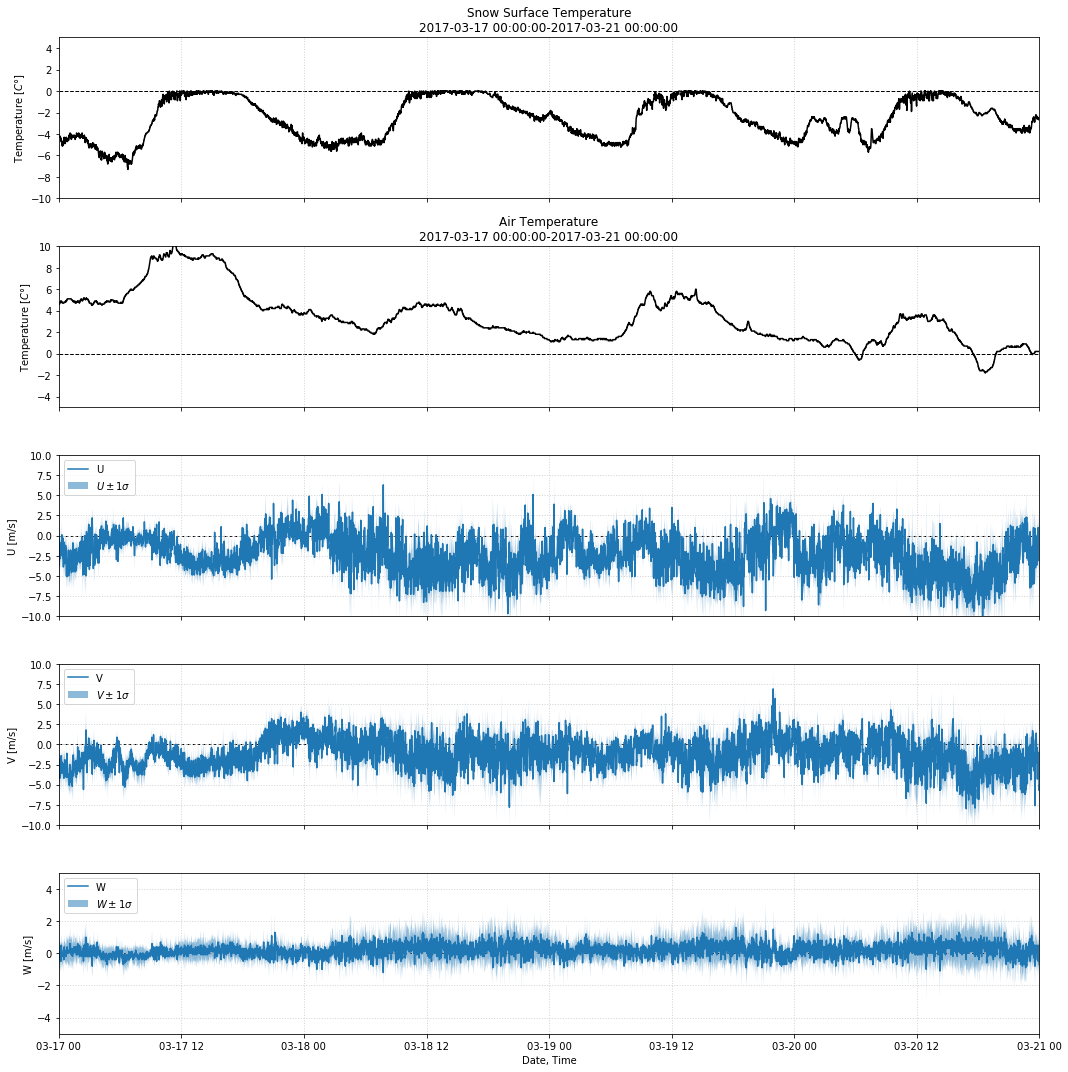

In [11]:
startdate = pd.Timestamp('2017-03-17')
enddate = pd.Timestamp('2017-03-21')

fig, ax = plt.subplots(5,1,figsize=(15,15))
# Snow surface temp
ax[0].set_title('Snow Surface Temperature\n{}-{}'.format(startdate,enddate))
cues['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].plot(ax=ax[0],
                                                                                  c='k')
ax[0].set_ylim((-10,5))

# Air temp
ax[1].set_title('Air Temperature\n{}-{}'.format(startdate,enddate))
cues['Platform temperature; platform temperature/relative humidity; (degrees Celsius)'].plot(ax=ax[1],
                                                                                            c='k')
ax[1].set_ylim((-5,10))

# finish up plot labels, axes, etc
for _ax in ax[0:2]:
    _ax.set_xlim((startdate,enddate))
    #_ax.set_ylim((-15,15))
    _ax.set_ylabel('Temperature [$C\degree$]')
    _ax.set_xlabel('Date, Time')
    _ax.grid(axis='x',color='lightgrey', linestyle=':', linewidth=1)
    _ax.axhline(0,color='k', linestyle='--', linewidth=1, zorder=-99)

# 3D winds
cues.Sonic3D_U.plot(ax=ax[2], label='U')
ax[2].fill_between(cues.index, cues.Sonic3D_U + cues.Sonic3D_U_SD, cues.Sonic3D_U - cues.Sonic3D_U_SD,
                  alpha=0.5, label='$U\pm1\sigma$')
ax[2].set_ylabel('U [m/s]')
ax[2].set_ylim((-10,10))

cues.Sonic3D_V.plot(ax=ax[3], label='V')
ax[3].fill_between(cues.index, cues.Sonic3D_V + cues.Sonic3D_V_SD, cues.Sonic3D_V - cues.Sonic3D_V_SD,
                  alpha=0.5, label='$V\pm1\sigma$')
ax[3].set_ylabel('V [m/s]')
ax[3].set_ylim((-10,10))

cues.Sonic3D_W.plot(ax=ax[4], label='W')
ax[4].fill_between(cues.index, cues.Sonic3D_W + cues.Sonic3D_W_SD, cues.Sonic3D_W - cues.Sonic3D_W_SD,
                  alpha=0.5, label='$W\pm1\sigma$')
ax[4].set_ylabel('W [m/s]')
ax[4].set_ylim((-5,5))

# finish up plot labels, axes, etc
for _ax in ax[2:]:
    _ax.set_xlim((startdate,enddate))
    #_ax.set_ylim((-5,5))
    _ax.set_xlabel('Date, Time')
    _ax.grid(axis='both',color='lightgrey', linestyle=':', linewidth=1)
    _ax.axhline(0,color='k', linestyle='--', linewidth=1, zorder=-99)
    _ax.legend(loc='upper left')

# more plot formatting
fig.autofmt_xdate(rotation=0, ha='center')
plt.tight_layout()


In [16]:
airTemp = 270
airPres = 101000.
airVaporPress, air_dSVP_dT = turbpy.satVapPress(airTemp - 273.)
windspd = 2.
sfcTemp = 265
sfcVaporPress, sfc_dSVP_dT = turbpy.satVapPress(sfcTemp - 273.)
snowDepth = 0.
mHeight = 2.
groundSnowFraction = 1
param_dict = {'stability_method': 'standard'}
z0Ground = .005


(
conductanceSensible,  # ground conductance for sensible heat (m s-1)
conductanceLatent,  # ground conductance for latent heat (m s-1)
senHeatGround,  # sensible heat flux from ground surface (W m-2)
latHeatGround,  # latent heat flux from ground surface (W m-2)
stabilityCorrectionParameters,  # Stability correction (0-1)
param_dict  # Return the parameterizations used in this run.
    ) = turbpy.turbFluxes(  airTemp,  # air temperature at some height above the surface (K)
                       airPres,  # air pressure of the air above the vegetation canopy (Pa)
                       airVaporPress,  # vapor pressure of the air above the vegetation canopy (Pa)
                       windspd,  # wind speed above the canopy (m s-1)
                       sfcTemp,  # ground temperature (K)
                       sfcVaporPress,  # Vapor pressure at the surface (Pa)
                       snowDepth,  # depth of snow (m)
                       mHeight,  # height of observations (m)
                       groundSnowFraction,  # Fraction of surface covered by snow (-). Used in latent heat calculation.
                       param_dict,  # dictionary of parameters and parameterizations
                       z0Ground  # Surface roughness length for log-layer (m)
                     )

print('\nGround conductance for sensible heat (m s-1):\t\t',conductanceSensible)
print('\nGround conductance for latent heat (m s-1):\t\t',conductanceLatent)
print('\nSensible heat flux from ground surface (W m-2):\t\t',senHeatGround)
print('\nLatent heat flux from ground surface (W m-2):\t\t',latHeatGround)
print('\nStability correction (0-1):\n')
pprint(stabilityCorrectionParameters)
print('\nParameterizations used in this run:\n')
pprint(param_dict)


Ground conductance for sensible heat (m s-1):		 0.0026164416218785592

Ground conductance for latent heat (m s-1):		 0.0026164416218785592

Sensible heat flux from ground surface (W m-2):		 16.99987156087211

Latent heat flux from ground surface (W m-2):		 9.169442481769304

Stability correction (0-1):

{'conductanceNeutral': 0.004457116594058258,
 'stabilityCorrection': 0.2935128088601624}

Parameterizations used in this run:

{'available_capping': ['no_capping',
                       'louis_Ri_capping',
                       'windless_exchange',
                       'obukhov_length_capping',
                       'zeta_capping',
                       'no_capping',
                       'minimum_wind'],
 'available_stab_methods': ['standard', 'louis', 'mahrt', 'monin_obukhov'],
 'capping': 'no_capping',
 'monin_obukhov': {'available_capping': ['windless_exchange',
                                         'zeta_capping',
                                         'no_capping',
  

C:\Users\steve\Anaconda3\lib\site-packages\turbpy-1.1-py3.6.egg\turbpy\parameter_methods.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [17]:
pprint.pprint('hello world')

AttributeError: 'function' object has no attribute 'pprint'

In [ ]:
(conductance_sensible[stab][n], _,
         sensible_heat[stab][n], _,
         stab_output, p_test) = turbpy.turbFluxes(tair, airPressure,
                                                  vpair, u, tsfc,
                                                  vpsfc, snowDepth,
                                                  mHeight, param_dict=stab_dict[stab],
                                                  z0Ground=.005)